<a href="https://colab.research.google.com/github/theill95/HFF/blob/main/EURUSD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# load data
df = pd.read_csv('/content/EURUSD_data_20230725_211832.csv', parse_dates=['Timestamp'], dayfirst=True)

# set index
df.set_index('Timestamp', inplace=True)

# sort by index
df.sort_index(inplace=True)

print(df.head())

                         Ask      Bid    Volume
Timestamp                                      
2022-07-24 21:05:00  1.02138  1.02128  0.000009
2022-07-24 21:06:00  1.02137  1.02127  0.000009
2022-07-24 21:07:00  1.02134  1.02124  0.000009
2022-07-24 21:09:00  1.02108  1.02098  0.000009
2022-07-24 21:10:00  1.02126  1.02116  0.000009


In [8]:
# check correct types
print(df.dtypes)
print(type(df.index))

Ask       float64
Bid       float64
Volume    float64
dtype: object
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


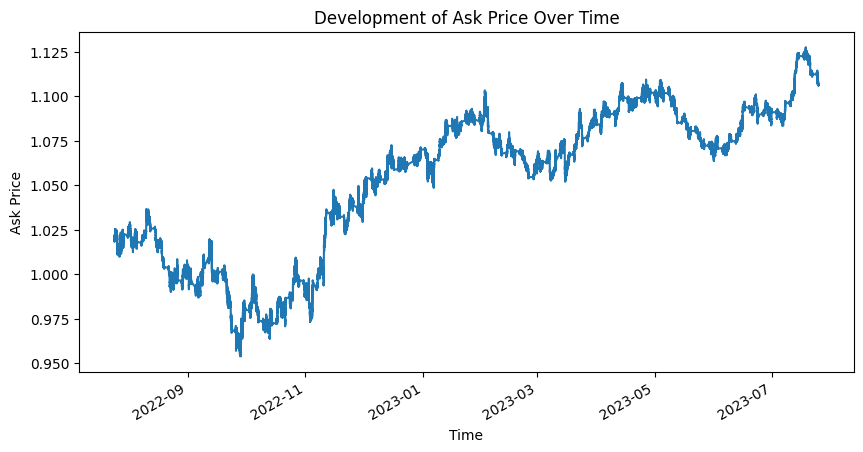

In [9]:
# plot for ask prices over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Ask'].plot()
plt.title('Development of Ask Price Over Time')
plt.xlabel('Time')
plt.ylabel('Ask Price')
plt.show()


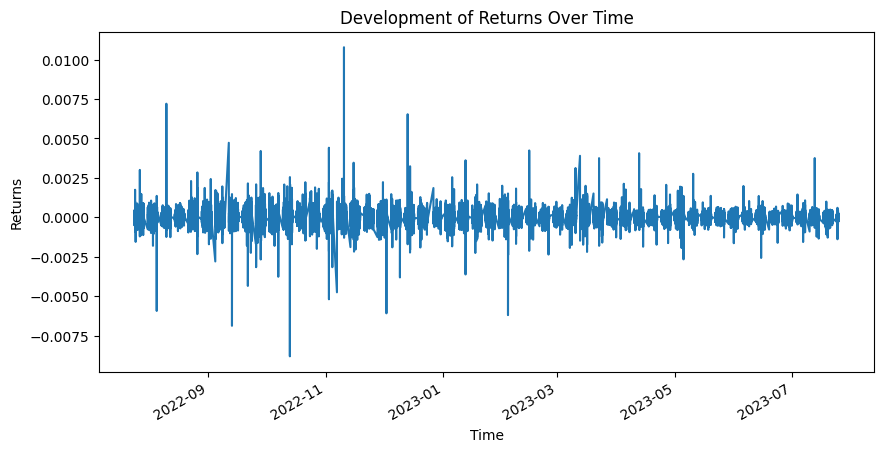

In [15]:
# generate spread
df['Spread'] = df['Ask'] - df['Bid']

# generate returns
df['Returns'] = df['Ask'].pct_change()



# plot for returns over time
plt.figure(figsize=(10,5))
df['Returns'].plot()
plt.title('Development of Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

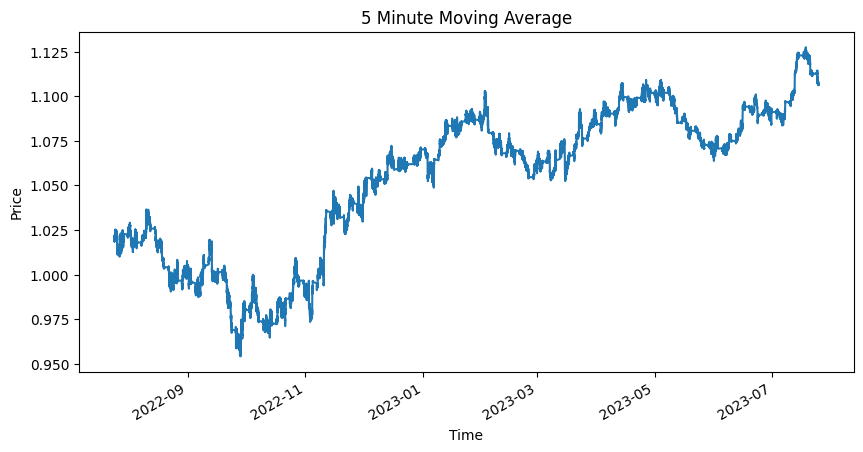

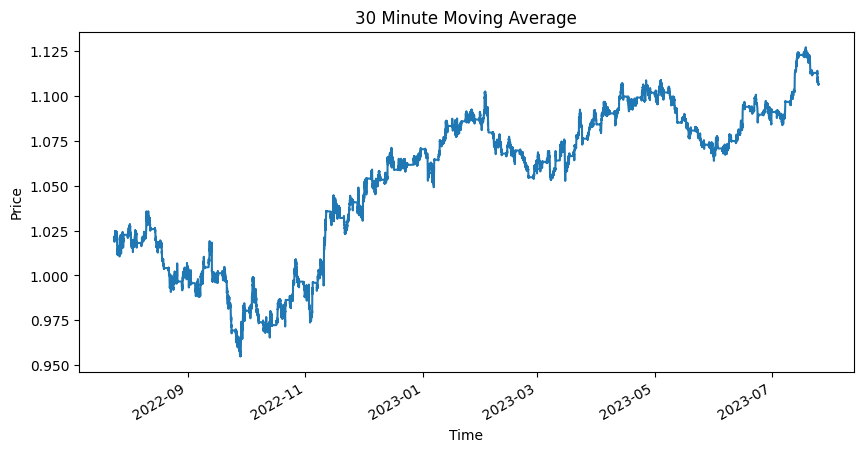

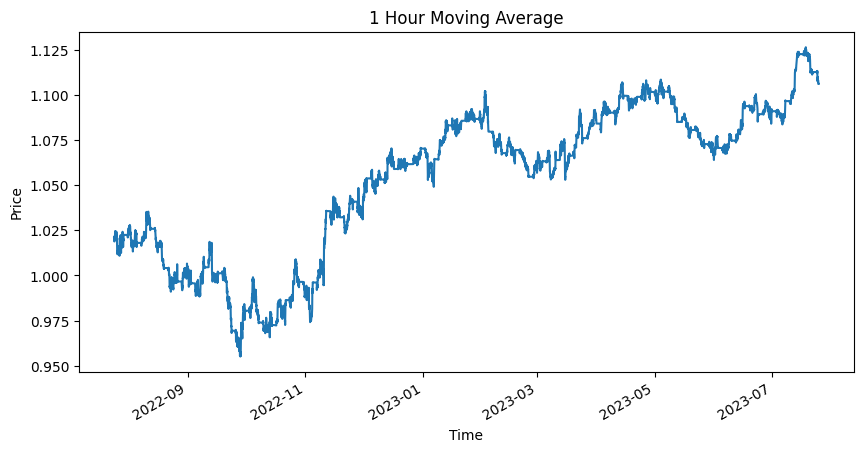

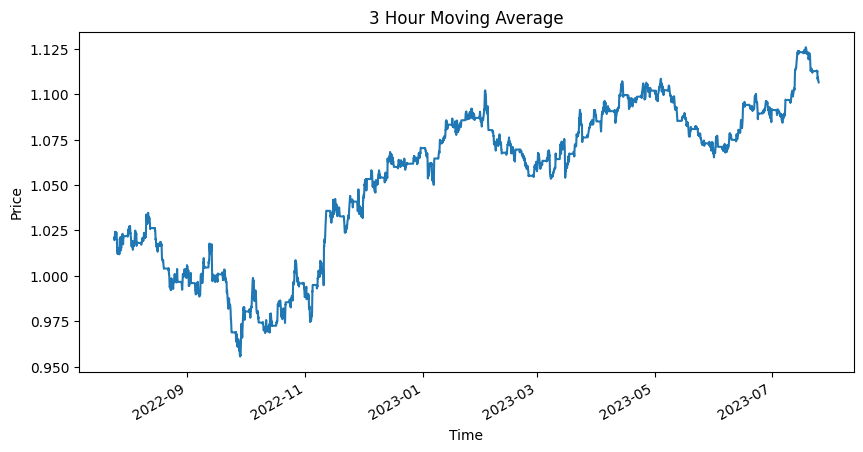

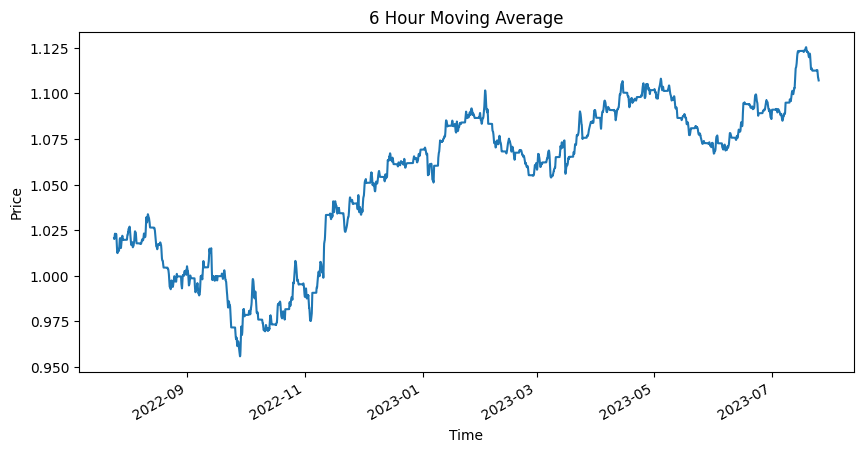

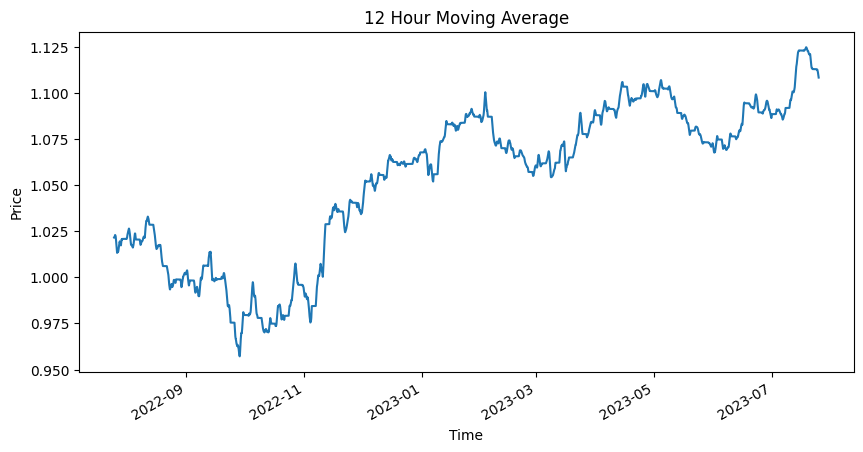

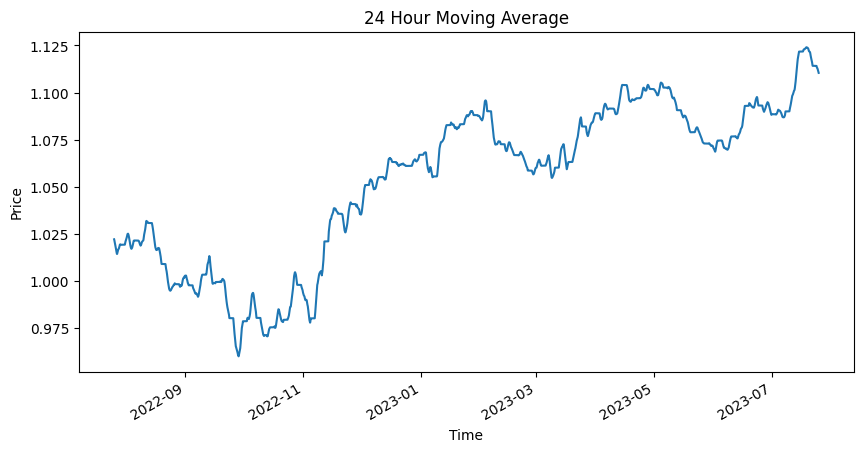

In [22]:
# generate moving averages

df['MA_5M'] = df['Ask'].rolling(5).mean()
df['MA_30M'] = df['Ask'].rolling(30).mean()
df['MA_1H'] = df['Ask'].rolling(60).mean()
df['MA_3H'] = df['Ask'].rolling(180).mean()
df['MA_6H'] = df['Ask'].rolling(540).mean()
df['MA_12H'] = df['Ask'].rolling(1080).mean()
df['MA_24H'] = df['Ask'].rolling(2160).mean()


# plots

plt.figure(figsize=(10,5))
df['MA_5M'].plot()
plt.title('5 Minute Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_30M'].plot()
plt.title('30 Minute Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_1H'].plot()
plt.title('1 Hour Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_3H'].plot()
plt.title('3 Hour Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_6H'].plot()
plt.title('6 Hour Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_12H'].plot()
plt.title('12 Hour Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['MA_24H'].plot()
plt.title('24 Hour Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


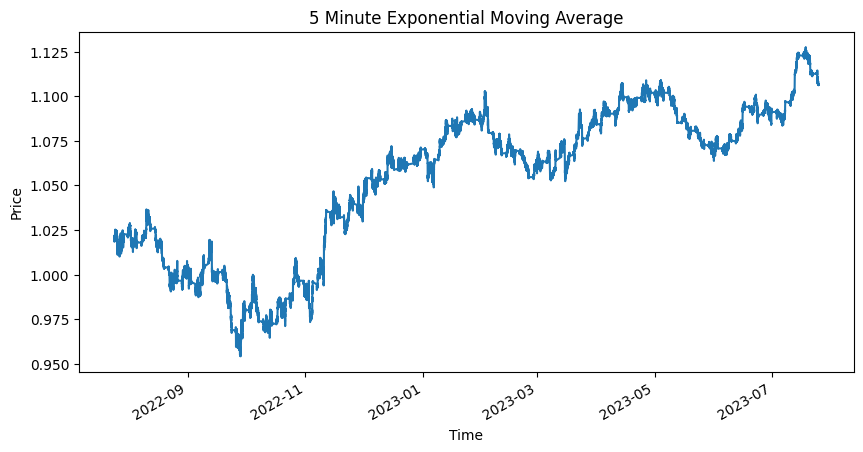

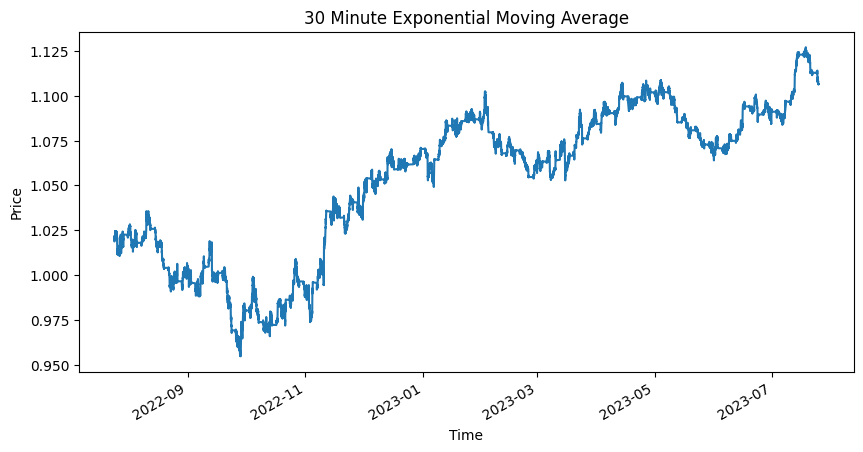

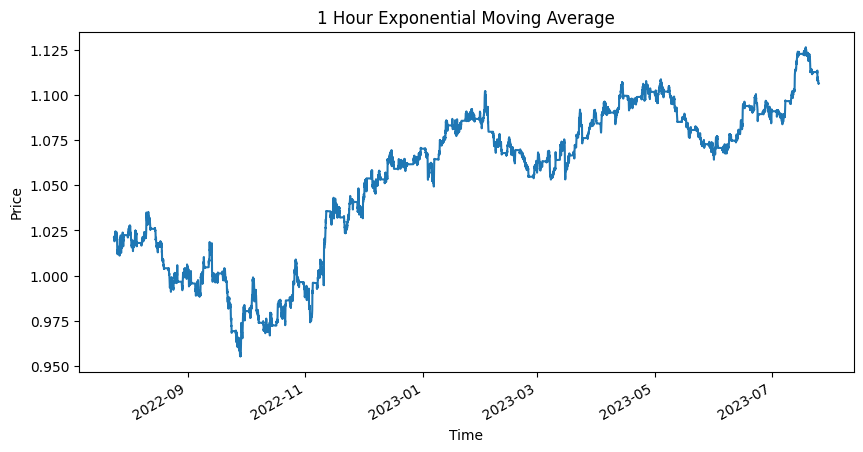

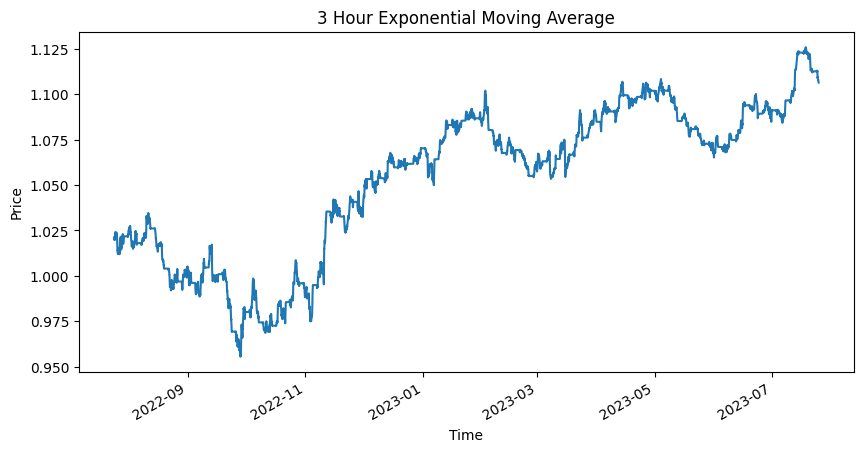

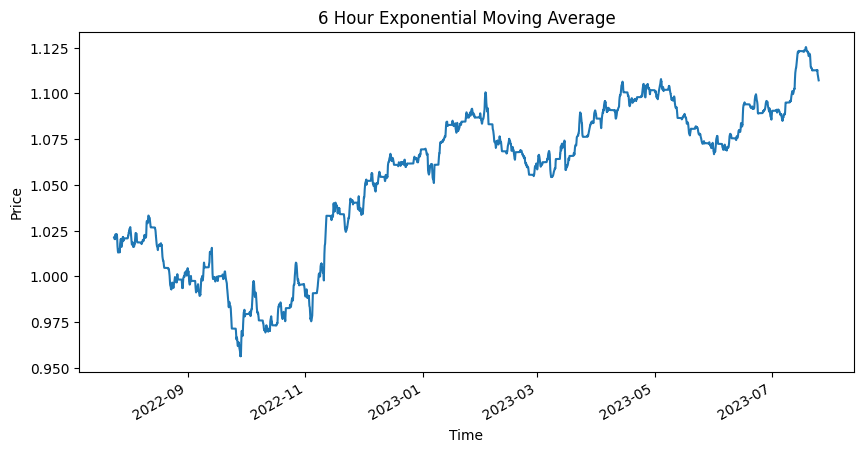

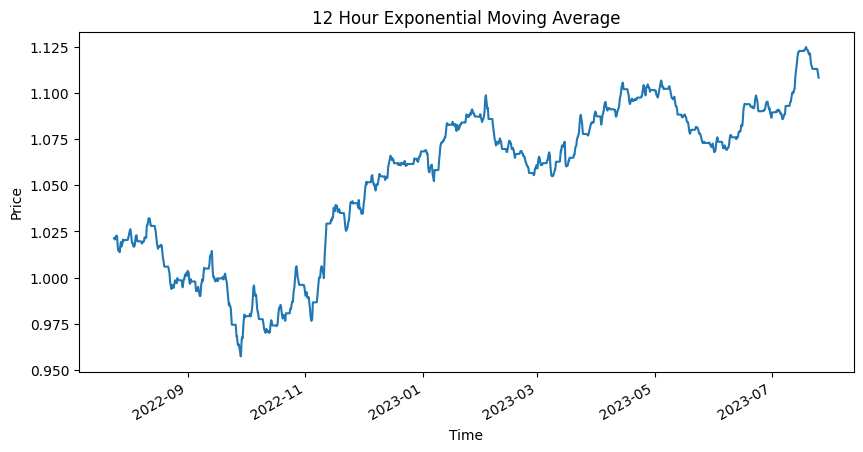

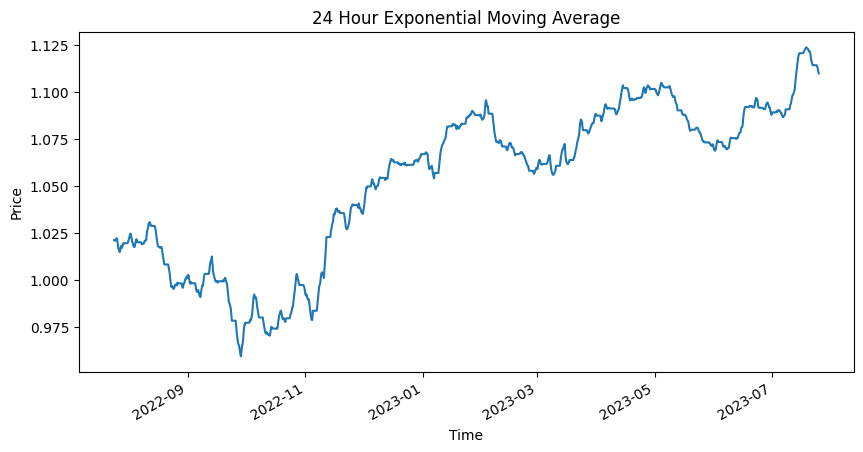

In [23]:
# Generate exponential moving averages
df['EMA_5M'] = df['Ask'].ewm(span=5, adjust=False).mean()
df['EMA_30M'] = df['Ask'].ewm(span=30, adjust=False).mean()
df['EMA_1H'] = df['Ask'].ewm(span=60, adjust=False).mean()
df['EMA_3H'] = df['Ask'].ewm(span=180, adjust=False).mean()
df['EMA_6H'] = df['Ask'].ewm(span=540, adjust=False).mean()
df['EMA_12H'] = df['Ask'].ewm(span=1080, adjust=False).mean()
df['EMA_24H'] = df['Ask'].ewm(span=2160, adjust=False).mean()

# Plotting
plt.figure(figsize=(10,5))
df['EMA_5M'].plot()
plt.title('5 Minute Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_30M'].plot()
plt.title('30 Minute Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_1H'].plot()
plt.title('1 Hour Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_3H'].plot()
plt.title('3 Hour Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_6H'].plot()
plt.title('6 Hour Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_12H'].plot()
plt.title('12 Hour Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
df['EMA_24H'].plot()
plt.title('24 Hour Exponential Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


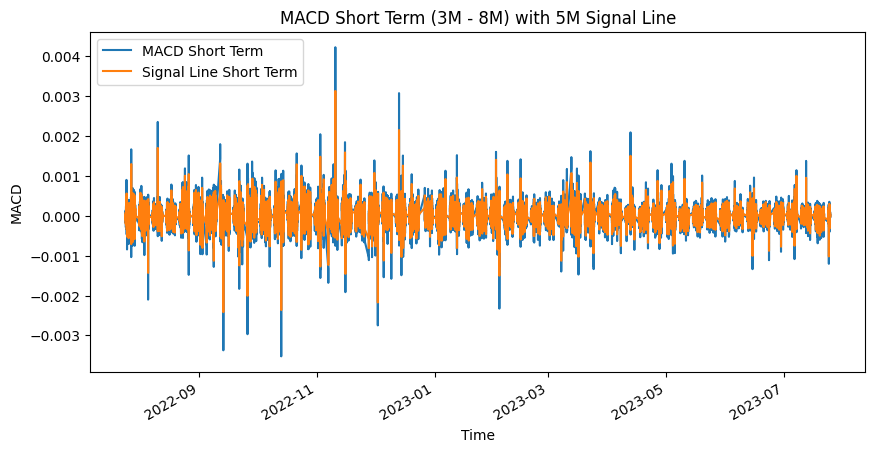

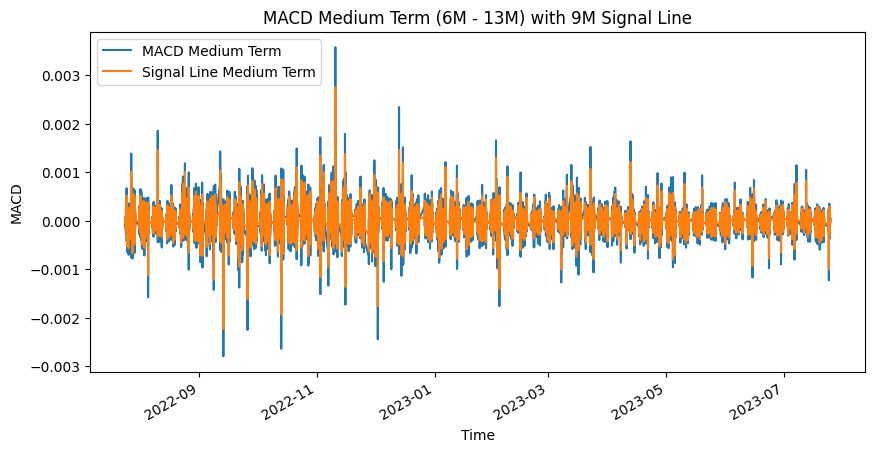

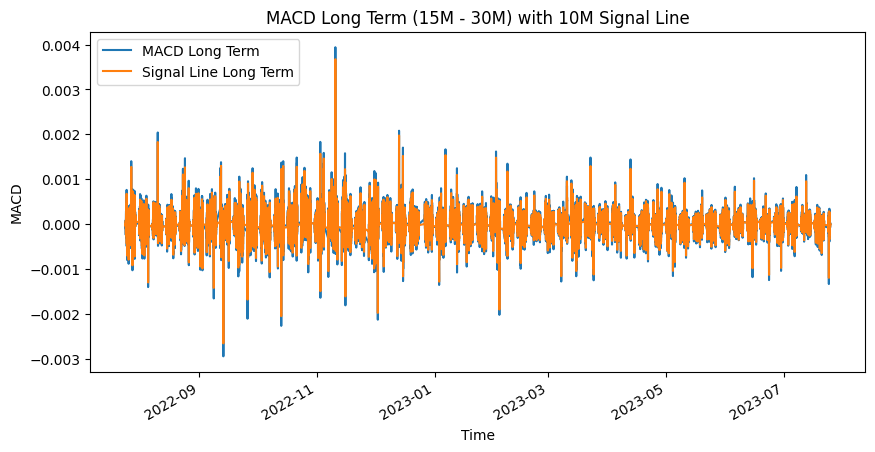

In [24]:
# generate MACDs (Moving Average Convergence Divergence)

# short term
df['EMA_3M'] = df['Ask'].ewm(span=3, adjust=False).mean()
df['EMA_8M'] = df['Ask'].ewm(span=8, adjust=False).mean()
df['MACD_ShortTerm'] = df['EMA_3M'] - df['EMA_8M']
df['Signal_ShortTerm'] = df['MACD_ShortTerm'].ewm(span=5, adjust=False).mean()

# medium term
df['EMA_6M'] = df['Ask'].ewm(span=6, adjust=False).mean()
df['EMA_13M'] = df['Ask'].ewm(span=13, adjust=False).mean()
df['MACD_MediumTerm'] = df['EMA_6M'] - df['EMA_13M']
df['Signal_MediumTerm'] = df['MACD_MediumTerm'].ewm(span=9, adjust=False).mean()

# long term
df['EMA_15M'] = df['Ask'].ewm(span=15, adjust=False).mean()
df['EMA_30M'] = df['Ask'].ewm(span=30, adjust=False).mean()
df['MACD_LongTerm'] = df['EMA_15M'] - df['EMA_30M']
df['Signal_LongTerm'] = df['MACD_LongTerm'].ewm(span=10, adjust=False).mean()

# plots
plt.figure(figsize=(10,5))
df['MACD_ShortTerm'].plot(label='MACD Short Term')
df['Signal_ShortTerm'].plot(label='Signal Line Short Term')
plt.title('MACD Short Term (3M - 8M) with 5M Signal Line')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
df['MACD_MediumTerm'].plot(label='MACD Medium Term')
df['Signal_MediumTerm'].plot(label='Signal Line Medium Term')
plt.title('MACD Medium Term (6M - 13M) with 9M Signal Line')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
df['MACD_LongTerm'].plot(label='MACD Long Term')
df['Signal_LongTerm'].plot(label='Signal Line Long Term')
plt.title('MACD Long Term (15M - 30M) with 10M Signal Line')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend(loc='upper left')
plt.show()
